In [1]:
# permet l'affchage des graphiques dans la continuité du code,
# et non dans une fenêtre à part
%matplotlib inline

# importations
from random import randint
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
plt.rcParams.update({ 'font.size' : 15, 'xtick.labelsize':15, 'ytick.labelsize':15 })

In [2]:
# definition d'une classe Strategy afin d'organiser la récupération
# des résultats obtenus :
# > KEEP (garder la porte de départ) = 0
# > CHANGE (changer de porte) = 1
# > ALEA (choisir aléatoirement entre la porte de départ et la non-éliminée) = 2
class Strategy(Enum):
    KEEP = 0
    CHANGE = 1
    ALEA = 2

In [3]:
# Fonction play_game
# Simule une partie du jeu de Mounty Hall (modifié) en prenant
# la stratégie à appliquer en paramètre
def play_game(strategy):
    # on numérote les portes de 0 à 2
    doors = [0, 1, 2]
    # on fixe au hasard quelle est la bonne porte
    good_door = randint(0, 2)
    # le joueur fait son premier choix au hasard, que l'on retire
    # de la liste des portes
    first_choice = randint(0, 2)
    doors.remove(first_choice)
    
    # si le premier choix du joueur est la bonne porte
    # on retire au hasard l'une des portes (mauvaises) restantes
    # dans la liste des portes
    if (first_choice == good_door):
        doors.remove(doors[randint(0, 1)])
    # sinon on met à jour la valeur de doors (qui est forcément
    # la bonne porte, donc) :
    else:
        doors = [good_door]
    
    # on instancie le second choix à la valeur 0
    second_choice = 0
    
    # si la stratégie à appliquer est de garder la première porte :
    # alors second_choice prends la valeur de first_choice
    if (strategy == Strategy.KEEP):
        second_choice = first_choice
    # sinon si la stratégie est de changer de porte :
    # second_choice prends la valeur de la seule autre porte
    elif (strategy == Strategy.CHANGE) :
        second_choice = doors[0]
    # sinon si la stratégie est de choisir au hasard :
    else:
        h = randint(0,1)
        if (h == 1):
            second_choice = first_choice
        else:
            second_choice = doors[0]
    
    return second_choice == good_door

In [4]:
# Fonction play
# prends une stratégie à appliquer et un entier itr
# renvoie une liste de taille itr contenant des 1 et 0
# > 1 si le joueur a gagné
# > 0 s'il a perdu
def play(strategy, itr):
    return [1 if play_game(strategy) else 0 for i in range(itr)]

Text(0.5, 1.0, 'Nombre de victoires du joueur en fonction de la\nstratégie appliquée')

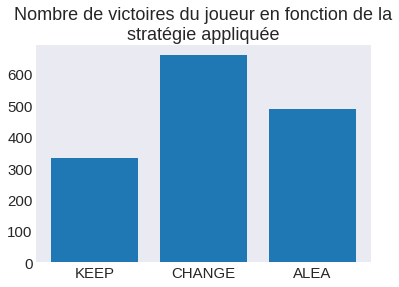

In [9]:
plt.bar( [1,2,3], [sum(play(Strategy.KEEP, 1000)), 
                   sum(play(Strategy.CHANGE, 1000)),
                   sum(play(Strategy.ALEA, 1000))],
       tick_label = ["KEEP", "CHANGE", "ALEA"])
plt.title("Nombre de victoires du joueur en fonction de la\nstratégie appliquée")

In [6]:
wins_CHANGE = []
wins_KEEP = []
wins_ALEA = []
samples = [1000, 10000, 20000, 50000, 80000, 100000]
for turns in samples:
    wins_CHANGE.append(play(Strategy.CHANGE, turns))
    wins_KEEP.append(play(Strategy.KEEP, turns))
    wins_ALEA.append(play(Strategy.ALEA, turns))

Text(0.5, 1.0, "Somme de victoires de la stratégie appliquée\nen fonction de la taille de l'échantillon")

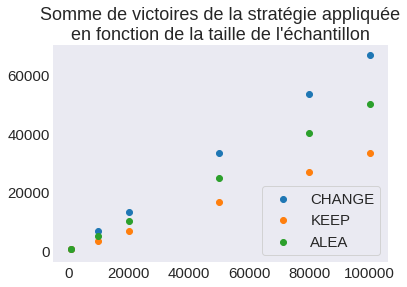

In [10]:
figure = plt.figure()
plt.scatter(samples, [sum(x) for x in wins_CHANGE], label="CHANGE")
plt.scatter(samples, [sum(x) for x in wins_KEEP], label="KEEP")
plt.scatter(samples, [sum(x) for x in wins_ALEA], label="ALEA")
plt.legend(loc='lower right', frameon=True)
plt.title("Somme de victoires de la stratégie appliquée\nen fonction de la taille de l'échantillon")